<a href="https://colab.research.google.com/github/MohammedFarzin/Fine-tuning-llms/blob/main/Fine_tuning_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and analyze the dataset


In [ ]:
# Install libraries
! pip install transformers faiss-gpu datasets sentence_transformers --progress-bar off

In [ ]:
from google.colab import userdata

hf_token = userdata.get('huggingface')

In [ ]:
# loading the dataset
from datasets import load_dataset

dataset = load_dataset("garage-bAInd/Open-Platypus")
dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction', 'data_source'],
        num_rows: 24926
    })
})

In [ ]:
dataset['train'].to_pandas()

input  ...    data_source
0            ...  MATH/PRM-800K
1            ...  MATH/PRM-800K
2            ...  MATH/PRM-800K
3            ...  MATH/PRM-800K
4            ...  MATH/PRM-800K
...     ...  ...            ...
24921        ...        guanaco
24922        ...        guanaco
24923        ...        guanaco
24924        ...        guanaco
24925        ...        guanaco

[24926 rows x 4 columns]

In [ ]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns

tokenizer = AutoTokenizer.from_pretrained('unsloth/llama-3-8b')
instruction_token_counts = [len(tokenizer.tokenize(example['instruction'])) for example in dataset['train']]
output_token_counts = [len(tokenizer.tokenize(example['output'])) for example in dataset['train']]
combined_token_counts = [instruction + output for instruction , output in zip(instruction_token_counts, output_token_counts)]
combined_token_counts

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[286,
 148,
 247,
 168,
 484,
 221,
 358,
 115,
 349,
 272,
 146,
 271,
 270,
 195,
 185,
 1026,
 269,
 112,
 301,
 256,
 227,
 247,
 388,
 195,
 461,
 650,
 679,
 194,
 164,
 433,
 198,
 235,
 227,
 216,
 242,
 331,
 261,
 295,
 235,
 247,
 60,
 586,
 237,
 289,
 181,
 478,
 272,
 328,
 186,
 203,
 649,
 405,
 599,
 183,
 370,
 277,
 153,
 533,
 503,
 145,
 118,
 152,
 197,
 127,
 54,
 303,
 231,
 159,
 212,
 475,
 144,
 631,
 516,
 535,
 451,
 177,
 344,
 474,
 161,
 336,
 186,
 358,
 130,
 555,
 177,
 31,
 186,
 499,
 398,
 378,
 1018,
 338,
 363,
 331,
 395,
 266,
 130,
 111,
 101,
 132,
 296,
 547,
 399,
 216,
 276,
 241,
 231,
 215,
 192,
 364,
 356,
 271,
 215,
 169,
 192,
 144,
 355,
 151,
 321,
 250,
 561,
 339,
 600,
 301,
 118,
 263,
 184,
 209,
 120,
 201,
 229,
 263,
 211,
 194,
 833,
 219,
 254,
 240,
 299,
 304,
 553,
 239,
 260,
 171,
 235,
 261,
 242,
 164,
 358,
 250,
 117,
 320,
 267,
 116,
 123,
 181,
 361,
 264,
 232,
 890,
 308,
 141,
 408,
 121,
 320,
 291,
 239,

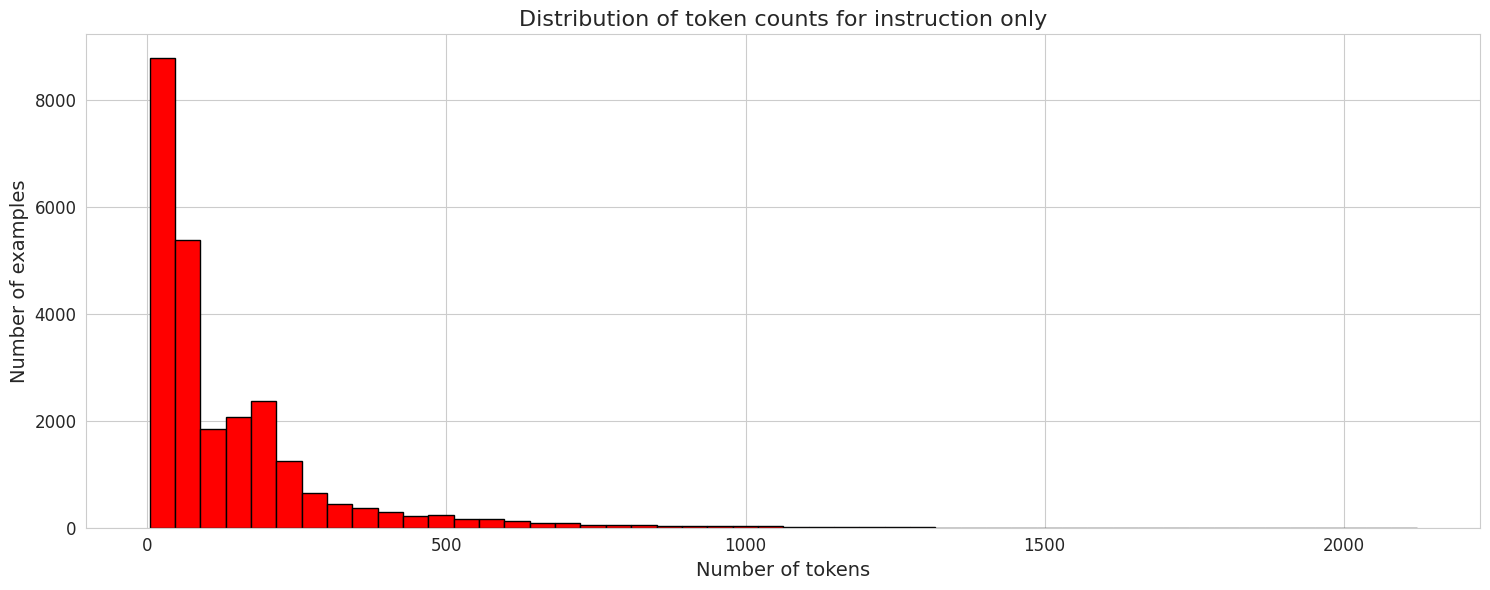

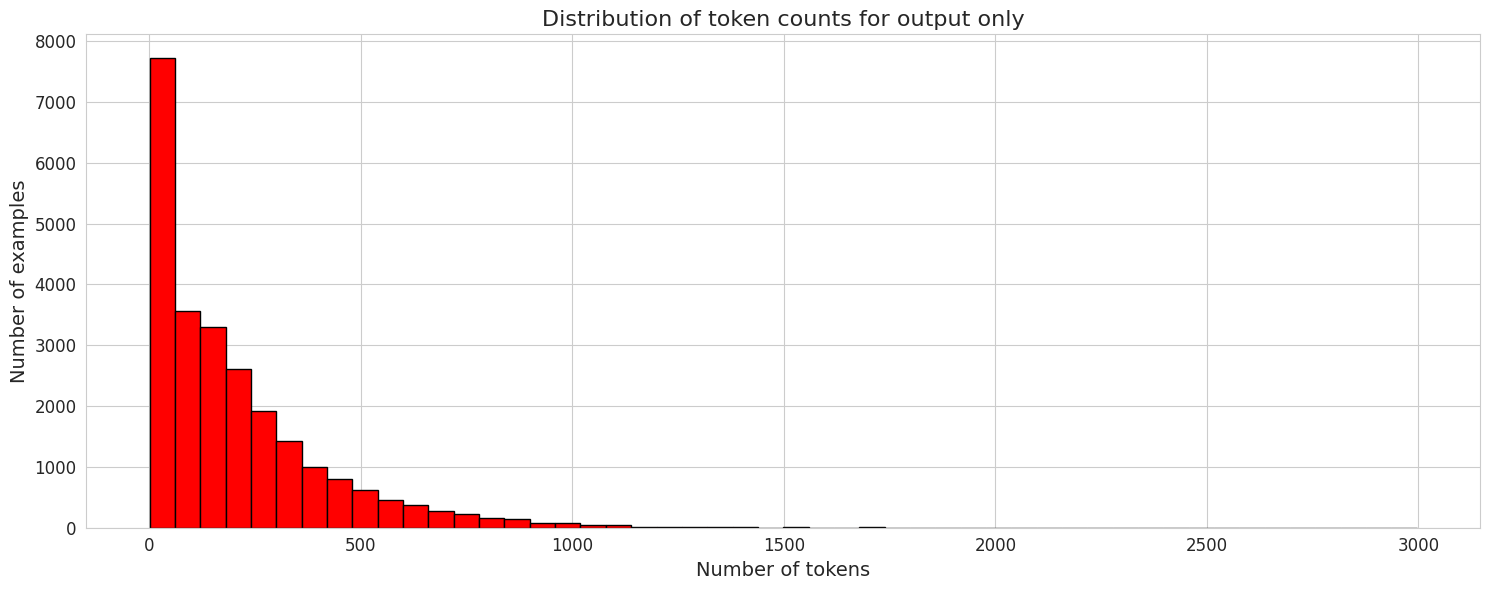

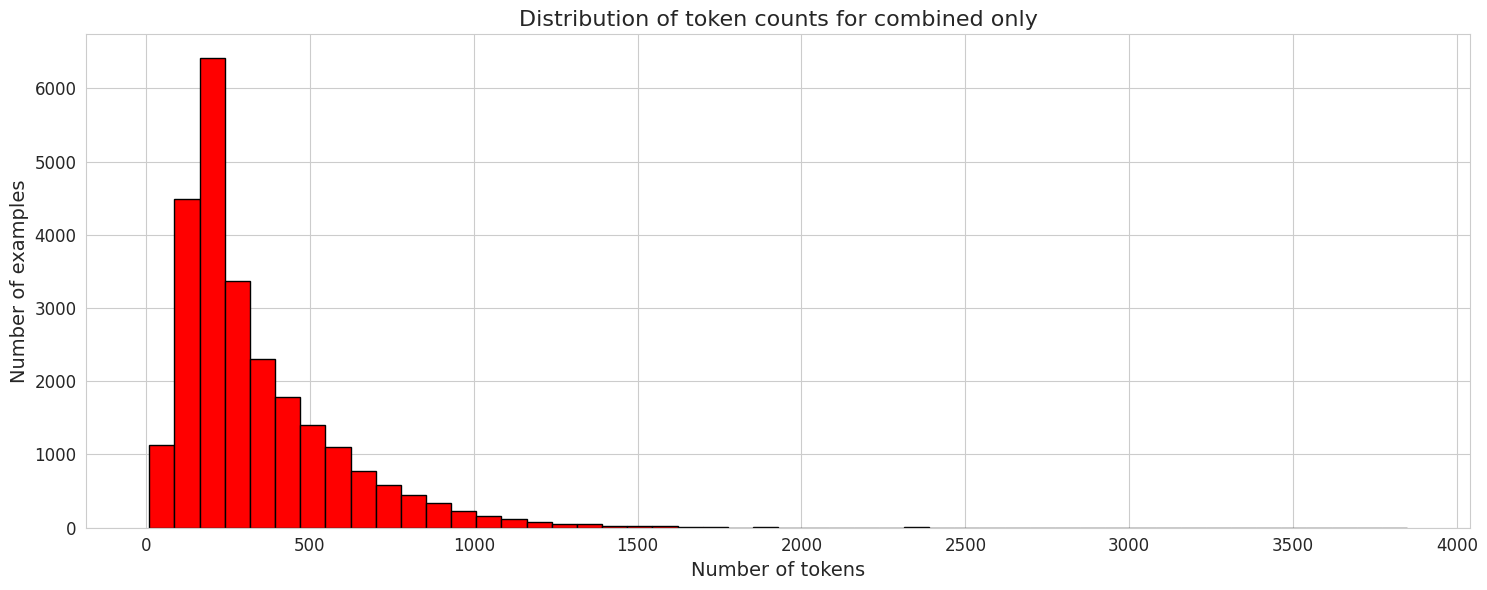

In [ ]:
def plot_distribution(token_counts, title):
  sns.set_style("whitegrid")
  plt.figure(figsize=(15, 6))
  plt.hist(token_counts, bins=50, color='r', edgecolor='black')
  plt.title(title, fontsize=16)
  plt.xlabel("Number of tokens", fontsize=14)
  plt.ylabel("Number of examples", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.tight_layout()
  plt.show()


plot_distribution(instruction_token_counts, "Distribution of token counts for instruction only")
plot_distribution(output_token_counts, "Distribution of token counts for output only")
plot_distribution(combined_token_counts, "Distribution of token counts for combined only")

## Filtering out rows

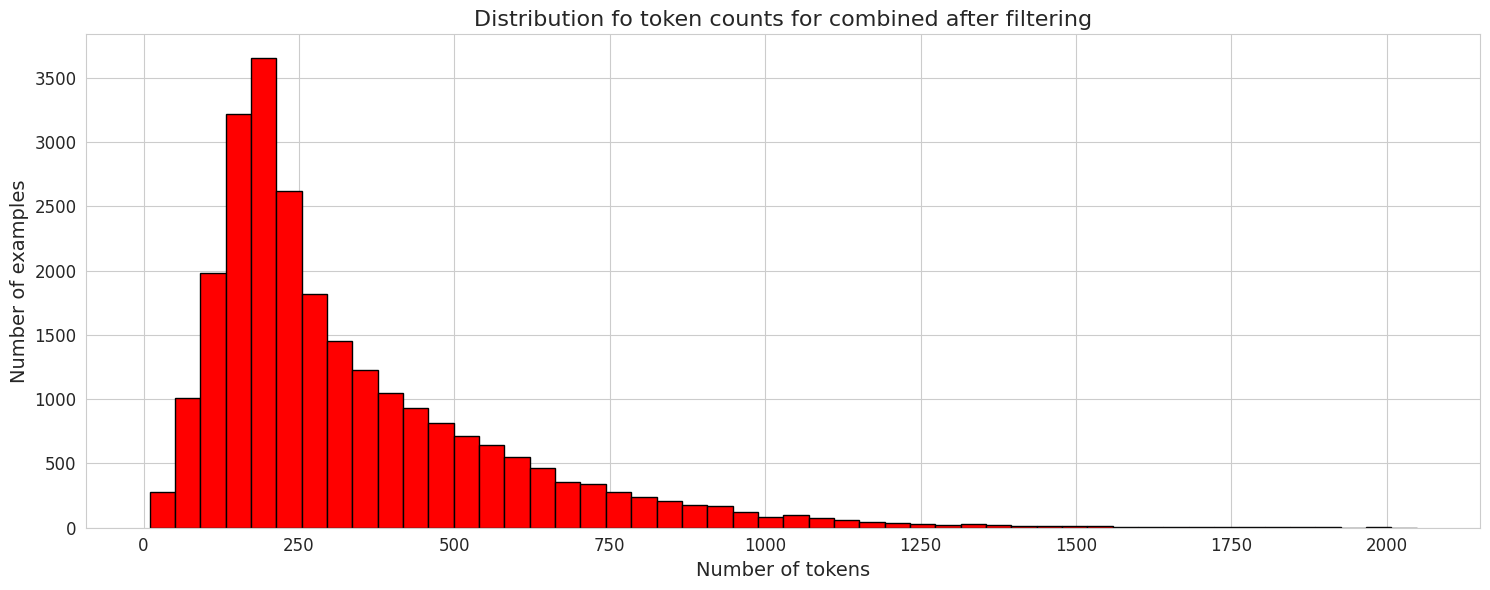

In [ ]:
valid_indices = [i for i, count in enumerate(combined_token_counts) if count <= 2048]
dataset['train'] = dataset['train'].select(valid_indices)
token_counts = [combined_token_counts[i] for i in valid_indices]

plot_distribution(token_counts, "Distribution fo token counts for combined after filtering")

## Dedupliction using embeddings

fatal: not a git repository (or any of the parent directories): .git
